# Tensores en PyTorch

Los tensores son la estructura básica de PyTorch. Son equivalentes a una matrix en álgebra lineal y se pueden entender como una extensión del objeto numpy.array. Se consideran un componente conceptual esencial en los sistemas de Deep Learning.

En el siguiente ejemplo, trabajaremos con tensores de dimensiones 2x3. En PyTorch, los tensores se pueden crear de la misma forma que los arrays de NumPy. Por ejemplo, podemos pasarles listas anidadas, tal y como se muestra a continuación:

In [2]:
import torch

In [3]:
x = torch.tensor([[1,2,3],
                 [4,5,6]])
y = torch.tensor([[7,8,9],
                 [10,11,12]])

De esta forma, hemos creado dos tensores, cada uno de los cuales tiene dimensiones 2x3. 

In [4]:
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [5]:
y

tensor([[ 7,  8,  9],
        [10, 11, 12]])

También podemos aplicarles funciones, como en el caso siguiente:

In [6]:
f = 2*x + y
print(f)

tensor([[ 9, 12, 15],
        [18, 21, 24]])


## Inicialización de tensores
En muchas ocasiones, es necesario inicializar tensores con valores por defecto. En el siguiente ejemplo se muestra cómo inicializar un tensor con ceros:

In [7]:
shape = [2, 3]
x_zeros = torch.zeros(shape)
x_zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

## Conversión tensor -> NumPy array
La conversión de un array de NumPy en un tensor se puede realizar de la forma siguiente:

In [8]:
import numpy as np

x_np = np.array([[1,2,3],
               [4,5,6]])

z = torch.from_numpy(x_np) + y
z

tensor([[ 8, 10, 12],
        [14, 16, 18]])

In [9]:
z.type()

'torch.LongTensor'

## Conversión NumPy array -> tensor

In [10]:
z_np = z.numpy()
z_np

array([[ 8, 10, 12],
       [14, 16, 18]])

In [11]:
type(z_np)

numpy.ndarray

## Especificar tipo de datos
El *dtype* por defecto es **FloatTensor**. Sin embargo, podemos especificar un tipo de datos particular usando el atributo *dtype* de los tensores:

In [12]:
x_int = torch.ones((2,3), dtype = torch.int)
x_int.type()

'torch.IntTensor'

# Operaciones con tensores: slicing, indexing, reshaping

## Slicing

In [13]:
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [14]:
x[0]

tensor([1, 2, 3])

In [15]:
x[1][0:2]

tensor([4, 5])

## Reshaping
Es posible crear una copia de un vector con dimensiones distintas a las originales utilizando la función *view()*.

Si se conoce el número de columnas que se requieren, pero no se sabe en cuántas filas encajarán, entonces indicar "-1" será como decirle a PyTorch que calcule el número de filas requeridas. Usarlo sin otra dimensión simplemente crea un tensor de una sola fila:

In [16]:
x.view(-1)

tensor([1, 2, 3, 4, 5, 6])

En este segundo ejemplo, no se conoce la forma del tensor de entrada pero se sabe que debe tener tres filas:

In [17]:
x.view(3, -1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Transposición

Una operación importante consiste en intercambiar ejes o transponer el tensor. Para un tensor bidimensional, podemos usar *tensor.transpose()*, pasándole el eje que queremos transponer. En este ejemplo, las filas simplemente se convierten en columnas:

In [18]:
x.transpose(0,1)

tensor([[1, 4],
        [2, 5],
        [3, 6]])

En PyTorch, *transpose()* solo puede intercambiar dos ejes a la vez. Podríamos utilizar la transposición en varios pasos, sin embargo, una forma más conveniente es usar *permute()*, pasándole los ejes que queremos intercambiar. El siguiente ejemplo debería aclarar esto:

In [19]:
a = torch.ones(1, 2, 3, 4)
a

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [20]:
a.transpose(0,3)

tensor([[[[1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.]]],


        [[[1.],
          [1.],
          [1.]],

         [[1.],
          [1.],
          [1.]]]])

In [21]:
a.transpose(1,2)

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [22]:
# Swap axis in two steps
a.transpose(0,3).transpose(1,2).size()

torch.Size([4, 3, 2, 1])

In [23]:
# Swap all axis at once
a.permute(3,2,1,0).size()

torch.Size([4, 3, 2, 1])

## Operaciones *in place*

Es importante comprender la diferencia entre las operaciones *in place* y las asignadas. Cuando, por ejemplo, usamos *transpose(x)*, se devuelve un valor pero el valor de x no cambia. En todos los ejemplos hasta ahora, hemos estado realizando operaciones por asignación. Es decir, hemos estado asignando una variable al resultado de una operación, o simplemente imprimiéndola en la salida, como en el ejemplo anterior. En cualquier caso, la variable original permanece intacta. Alternativamente, es posible que necesitemos aplicar una operación *in place*. Podemos, por supuesto, asignar una variable a sí misma, como en x = x.transpose(0,1). Sin embargo, una forma más conveniente de hacer esto es con operaciones *in place*. En general, las operaciones *in place* en PyTorch tienen un guión bajo al final. A continuación se muestra un ejemplo:

In [24]:
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [25]:
x.transpose(1, 0)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [26]:
x.transpose_(1, 0)
x

tensor([[1, 4],
        [2, 5],
        [3, 6]])

# Carga de datos en PyTorch

## Carga de datasets de PyTorch
PyTorch incluye algunos datasets para practicar. La clase que se usa para cargar datasets es *torch.dataloader*.

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

train_data = torchvision.datasets.CIFAR10(root = "./data",
                                         download = True, # Check if data has been already downloaded
                                         transform = transforms.ToTensor()) # Transform to tensor

train_data               

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [30]:
train_data[0][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [38]:
train_data[0][1]

6

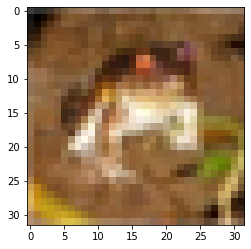

In [29]:
# Display an image
import matplotlib.pyplot as plt

# Index the first element of the first tuple (ie, the first image)
torch_img = train_data[0][0] 

# Change the axis "C H W" to "H W C"
np_img = torch_img.permute(1, 2, 0)

# Plot the image
plt.imshow(np_img)

In [28]:
for i in range(len(train_data)):
    print("The size of the image is {} and its label is {}".format(train_data[i][0].size(), train_data[i][1]))

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 4
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 2
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 6
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 5
The size of the image is torch.Size([3, 32, 32])

The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 3
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 9
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 0
The size of the image is torch.Size([3, 32, 32]) and its label is 1
The size of the image is torch.Size([3, 32, 32]) and its label is 7
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32]) and its label is 8
The size of the image is torch.Size([3, 32, 32])

## Carga de datos con *DataLoader*
Veremos que en un modelo de aprendizaje profundo, es posible que no siempre queramos cargar imágenes de una en una o cargarlas en el mismo orden cada vez. Por esta y otras razones, a menudo es mejor utilizar el objeto *torch.utils.data.DataLoader*. DataLoader proporciona un iterador multipropósito para muestrear los datos de una manera específica, como por ejemplo en lotes o aleatoriamente.

En el siguiente ejemplo, tomamos muestras del conjunto de datos en lotes de cuatro muestras cada uno:

In [39]:
train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size = 4,
                                          shuffle = True)

In [40]:
# Create an iterator from a DataLoader object
data_iter = iter(train_loader)

# Build tensors for the images and labels in the batch
images, labels = data_iter.next()

In [42]:
# Print the size of the batch
images.size()

torch.Size([4, 3, 32, 32])

In [41]:
# Print the label of the images in the batch
labels[0:]

tensor([5, 7, 3, 4])

Aquí *DataLoader* devuelve una tupla de dos tensores. El primer tensor contiene los datos de imagen de las cuatro imágenes del lote. El segundo tensor son las etiquetas de las imágenes. Cada lote consta de cuatro etiquetas de imagen, pares o muestras. Llamar a *next()* en el iterador genera el siguiente conjunto de cuatro muestras. 

En la terminología del aprendizaje automático, cada pasada sobre el conjunto de datos completo se denomina *epoch* (época). Esta técnica se utiliza ampliamente, como veremos para entrenar y probar modelos de aprendizaje profundo.

## Creación de un dataset custom 
La clase *Dataset* es una clase abstracta que representa un conjunto de datos. Su propósito es tener una forma coherente de representar las características específicas de un conjunto de datos. Cuando trabajamos con conjuntos de datos desconocidos, crear un objeto *Dataset* es una buena forma de comprender y representar la estructura de los datos. Se usa con una clase *data loader* para extraer muestras de un conjunto de datos de una manera limpia y eficiente. El siguiente diagrama ilustra cómo se utilizan estas clases.

En el siguiente ejemplo, usaremos un pequeño conjunto de datos de juguetes que consta de imágenes de objetos que se clasifican como "juguetes" o "no juguetes". Este ejemplo es representativo de un problema de clasificación de imágenes simple en el que un modelo se entrena en un conjunto de imágenes etiquetadas. 

Un modelo de deep learning necesitará los datos con varias transformaciones aplicadas de manera consistente. Es posible que sea necesario extraer muestras en lotes y barajar el conjunto de datos. Tener un framework para representar estas tareas de datos simplifica y mejora enormemente los modelos de aprendizaje profundo.

El conjunto de datos completo está disponible en http://www.vision.caltech.edu/pmoreels/Datasets/Giuseppe_Toys_03/

Para este ejemplo, crearemos un subconjunto más pequeño del conjunto de datos, junto con un archivo labels.csv. Está disponible en la carpeta *data/GiuseppeToys* en el repositorio de Github. La clase que representa este conjunto de datos es la siguiente:

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch
import csv
import os

class toy_dataset(Dataset):
    
    def __init__(self, data_path, labels_file, transform = None):
        
        # Define the path to the data directory
        self.data_path = data_path
        
        # Create a transform object
        self.transform = transform
        
        # Build a list of (name, label) tuples
        with open(os.path.join(self.data_path, labels_file)) as f:
            self.labels = [tuple(line) for line in csv.reader(f)]
            
        # Check that all images files exist
        for i in range(len(Self.labels)):
            assert os.path.isfile(data_path + "/" + self.labels[i][0])
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image_name, image_label = self.labels[idx][0:]
        image_path = os.path.join(self.data_path, image_name)
        image = Image.open(open(image_path, "rb"))
        
        # Transform the image if required
        if self.transform:
            image = self.transform(image)
        
        return ((image, image_label))

- La función *__init__* es la que permite inicializar todas las propiedades de la clase.

- La función *__len__* nos permite llamar a la función incorporada len() de Python en el conjunto de datos. Aquí, simplemente devolvemos la longitud de la lista de tuplas de etiquetas, lo que indica el número de imágenes en el conjunto de datos. Queremos asegurarnos de que sea lo más simple y confiable posible porque dependemos de ella para iterar correctamente a través del conjunto de datos.

- La función *__getitem__* es una función incorporada de Python que anulamos en nuestra definición de clase de Dataset. Esto le da a la clase Dataset la funcionalidad de los tipos de secuencia de Python, como el uso de indexación y división. Este método se llama con frecuencia (cada vez que hacemos una búsqueda de índice), así que es conveniente que solo haga lo que debe hacer para recuperar la muestra.

Para aprovechar esta funcionalidad en nuestro conjunto de datos, necesitamos crear una instancia de la siguiente manera:

In [ ]:
toy_data = toy_dataset("data/GiuseppeToys", 
                       "labels.csv", 
                       transform = transforms.ToTensor()) 

# Print the size of the first image in the dataset
print(toy_data[0][0].size())

# Print the label of the first image in the dataset
print(toy_data[0][1])

# Transformaciones
De igual manera que con la transformación *ToTensor()*, el paquete *torchvision* incluye varias utilidades de transformaciones que permiten realizar modificaciones sobre imágenes. Podemos aplicar múltiples transformaciones a un objeto *dataset* utilizando la función **compose**, tal y como se muestra a continuación:

In [ ]:
tfms = transforms.Compose([transforms.Grayscale(3),
                          transforms.CenterCrop(300),
                          transforms.ToTensor()])

toy_data = toy_dataset("data/GiuseppeToys", 
                       "labels.csv", 
                       transform = tfms)

Los objetos *Compose* son listas de transformaciones que se pueden pasar al dataset como si fueran una sola variable. Es importante tener en cuenta un par de cosas:
- Por un lado, que las transformaciones de imágenes solo se pueden aplicar a imágenes de PIL y no a tensores. 
- Por otro lado, que las transformaciones se pasan en el mismo orden en que se listan dentro del objeto Compose. Por eso, hay que poner la transformación *ToTensor* al final. De hecho, si se coloca antes de las transformaciones de PIL, dará error.

Para comprobar que todo funciona correctamente, se puede probar a utilizar un *DataLoader* para cargar un batch de imágenes con transformaciones:

In [ ]:
toy_loader = DataLoader(doy_data, 
                       batch_size = 4,
                       shuffle = True)

toy_iter = iter(toy_loader)
images, labels = toy_iter.next()

print(labels[0:])
print(images.size())

# ImageFolder

El objetivo principal de un objeto de tipo *dataset* es tomar una muestra de un dataset, mientras que la finalidad de un *DataLoader* es facilitar una muestra, o un batch de muestras, a un modelo de deep learning. Sin embargo, muchas veces las imágenes están organizadas en carpetas cuyos nombres corresponden a las categorías de dichas imágenes. Por ejemplo, para el ejemplo anterior sería lógico tener el dataset organizado en tres carpetas *toy*, *notoy* and *scenes*, todas ellas a su vez contenidas dentro de una carpeta superior que podría llamarse *images*.
Para casos como este, PyTorch dispone de una clase llamada **torchvision.datasets.ImageFolder**:

In [ ]:
from torchvision import datasets

data_fromfolders = datasets.ImageFolder(root = "data/GiuseppeToys/images",
                                       transform = tfms)

folder_loader = DataLoader(data_fromfolders, 
                          batch_size = 4,
                          shuffle = True)

images, labels = iter(folder_loader).next()

print(labels)

Dado que en este ejemplo, tenemos tres carpetas, que representan tres etiquetas, DataLoader devuelve enteros del 1 al 3, que representan las etiquetas de la imagen.

# Concatenación de datasets
En PyTorch, es posible concatenar datasets con la clase **ConcatDataset**. 

In [ ]:
tfms2 = transforms.Compose([transforms.CenterCrop(500),
                           transforms.ToTensor(),
                           RemoveChannel("b")]) # Remove blue color channel

toy_data2 = toy_dataset("data/GiuseppeToys", 
                       "labels.csv", 
                       transform = tfms2,
                       train = True)

concat_dataset = torch.utils.data.ConcatDataset([toy_data, toy_data2])

len(concat_dataset)